In [4]:
# Some Preliminary imports and so on
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Exploring simulated model atmospheres and their synthetic spectra

### In this jupyter notebook we will:
- Familiarize ourselves with a simulated 3D model of the solar photosphere, obtained with MURaM code (Rempel 2014)
- Familiarize ourselves with the synthetic spectrum of two iron spectral lines around 630 nm, calculated from this cube 
- Explore the relationship between the cube and the spectrum
- Prepare the data for the training in the simple DNN we will use later

The cube can be downloaded here:

https://drive.google.com/drive/folders/12S8h_zv2z8BwMg83JLVk04O9ke6Jy8bT?usp=sharing

## Simulation of the solar photosphere:

### What we have here:

A 4-D structure encoding 3D variation of different physical quantities in a path of the solar photosphere. 
Dimensions are as follows: 
- Parameter : 11 diferent physical parameters, we will only care about the temperature and velocity to begin with 
- Depth: 71 discrete depth points in the optical depth scale (recall the lecture)
- NX: 768 horizontal points, 16 km spacing 
- NY: 768 horizontal points alon different axis, 16 km spacing

In [35]:
# Open the atmos file and grab the data

atmos = fits.open("/home/milic/data/muram_from_rebecca/disk_center/atmos/qs_ph_disk_center_1_1_tau.fits")[0].data
atmos.shape

(11, 71, 768, 768)

In [36]:
# Copy what we need, delete the rest from memory

T = np.copy(atmos[1])
vz = np.copy(atmos[5])
tau = np.copy(atmos[0,:,0,0]) # this is identical for all the columns in this specific cube
print(T.shape)
print(vz.shape)
del(atmos)


(71, 768, 768)
(71, 768, 768)


In [37]:
# I personally prefer to order things as x,y,z (even though the last coordinate is not exactly z)

T = T.transpose(1,2,0)
vz = vz.transpose(1,2,0)

Text(0, 0.5, 'Temperature [K]')

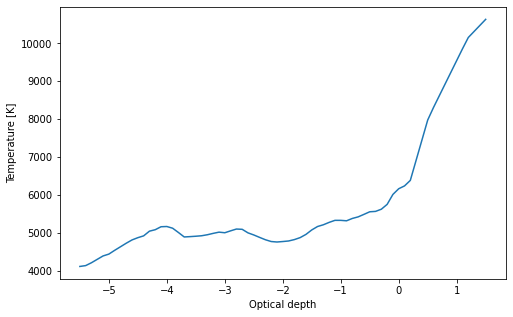

In [38]:
# Let's plot one example temperature structure and discuss briefly the axes:
i = 144
j = 256

plt.figure(figsize=[8,5])
plt.plot(tau, T[i,j])
plt.xlabel("Optical depth")
plt.ylabel("Temperature [K]")



### Discuss this for a while: 

- What is optical depth ($\tau$), what does it mean? Where is zero? What layers do the other values correspond to
- What are the ranges for the temperature? How does the gas behave at these temperatures. 
- Why is the temperature (generally) decreasing toward lower optical depths (top of the photosphere)

### After that, let's plot several different atmospheric stratifications:

Text(0, 0.5, 'Temperature [K]')

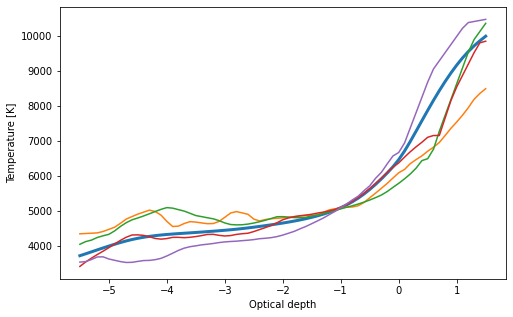

In [39]:
# I will actually first find the "mean" temperature stratification and then overplot some random ones 
T_mean = np.mean(T,axis=(0,1))

plt.figure(figsize=[8,5])
plt.plot(tau, T_mean, linewidth=3)
plt.plot(tau, T[133,266])
plt.plot(tau, T[179,519])
plt.plot(tau, T[0,100])
plt.plot(tau, T[333,111])
plt.xlabel("Optical depth")
plt.ylabel("Temperature [K]")

### This does not really allow us to see the structure of the simulation. 

Let's do this differently, let's plot the temperature structure at different depths:

$\log \tau = 0$ - bottom of the photosphere

$\log \tau = -1$ - mid photosphere

$\log \tau = -2$ - top photosphere

$\log \tau = -3$ - temperature minimum


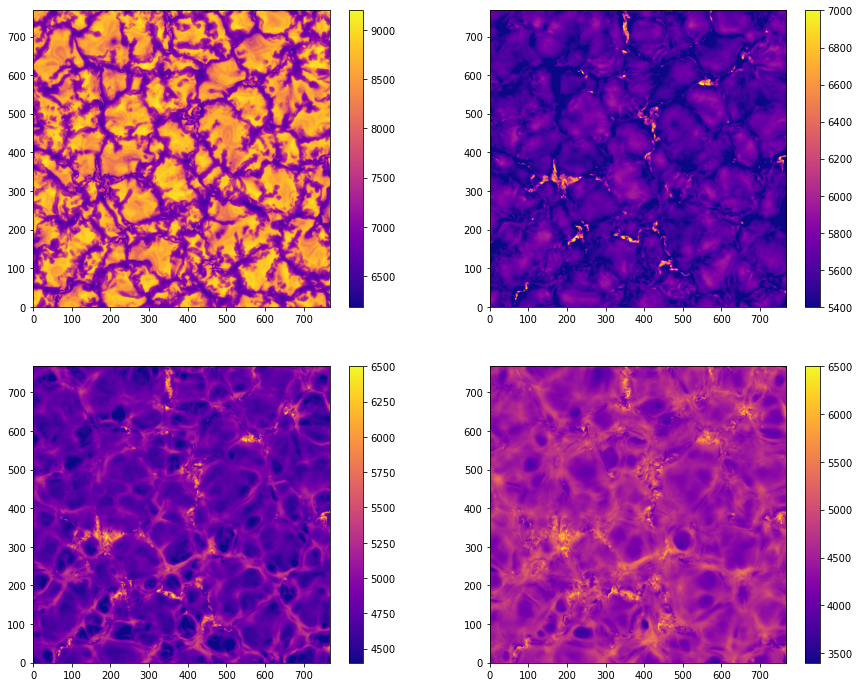

In [41]:
plt.figure(figsize=[15,12])
plt.subplot(221)
plt.imshow(T[:,:,10].T,cmap='plasma',origin='lower')
plt.colorbar()
plt.subplot(222)
plt.imshow(T[:,:,20].T,cmap='plasma',vmin=5400,vmax=7000, origin='lower')
plt.colorbar()
plt.subplot(223)
plt.imshow(T[:,:,30].T,cmap='plasma',vmin=4400,vmax=6500, origin='lower')
plt.colorbar()
plt.subplot(224)
plt.imshow(T[:,:,40].T,cmap='plasma',vmin=3400,vmax=6500, origin='lower')
plt.colorbar()

### Discuss what we see on these images and why is the temperature structure the way it is. 

### Keep in mind one thing: We DO imagine the Sun looks like this, but we cannot measure any of these directly!

### What can we measure then? The spectra:

Each of the pixels in this image can be imagined as a 1D atmosphere with it's own depth structure. 

According to the presentation we just had, the light is transported through this atmosphere and a spectrum is formed according to the radiative transfer equation:

## $$ \cos \theta \frac{dI_\lambda(z)}{dz} = - \chi_\lambda(z) I_\lambda(z) + j_\lambda(z) $$

We only see the solution of this equation: $I(\lambda)$, but the solution depends on the depth and wavelength variation of the coefficients $\chi$ and $j$.

We have some simulated pieces of the spectra prepared, let's see how they look like:



In [ ]:
stokes = fits.open("/home/milic/data/muram_from_rebecca/")